In [1]:
import sys
sys.executable
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages')

In [2]:
import os 
import pandas as pd
import glob
import pandas_profiling 
from functools import reduce
import numpy as np

%matplotlib inline

In [3]:
data_folder = os.path.join(os.getcwd(), 'data')
os.makedirs(data_folder, exist_ok=True)

## Read data in the whole directory

### TODO: come back and teach batch size processing of data

In [4]:
file_path_list = glob.glob(os.path.join(data_folder, "*.csv"))

datadict = {os.path.splitext(os.path.basename(file))[0]: pd.read_csv(file) 
                for file in file_path_list}

for df_name, val in datadict.items():
    print(df_name, val.shape)

weather_description (45253, 37)
humidity (45253, 37)
wind_direction (45253, 37)
temperature (45253, 37)
pressure (45253, 37)
city_attributes (36, 4)
wind_speed (45253, 37)


In [37]:
type(datadict['weather_description'])

pandas.core.frame.DataFrame

In [46]:
datadict['city_attributes'].head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [25]:
datadict['city_attributes'].tail()

,City,Country,Latitude,Longitude
31,Tel Aviv District,Israel,32.083328,34.799999
32,Eilat,Israel,29.558050,34.948212
33,Haifa,Israel,32.815559,34.989170
34,Nahariyya,Israel,33.005859,35.094090
35,Jerusalem,Israel,31.769039,35.216331


In [47]:
datadict['weather_description'].head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


In [30]:
datadict['pressure'].sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
26304,2015-10-02 12:00:00,1021.0,1023.0,1017.0,1023.0,1013.0,1013.0,1011.0,1009.0,1021.0,...,1021.0,1021.0,1032.0,1025.0,994.0,1016.0,1014.0,1017.0,1017.0,1016.0
19834,2015-01-05 22:00:00,1023.0,1040.0,1038.0,1037.0,1036.0,1035.0,1042.0,1036.0,1042.0,...,1040.0,1017.0,1024.0,1031.0,990.0,1015.0,958.0,1015.0,989.0,1026.0
30733,2016-04-04 01:00:00,1012.0,1015.0,1020.0,1014.0,1016.0,1017.0,1015.0,1014.0,1020.0,...,1016.0,1016.0,1016.0,1016.0,985.0,1013.0,969.0,1024.0,1024.0,1013.0
37220,2016-12-30 08:00:00,1021.0,1024.0,1025.0,1023.0,1019.0,1020.0,1024.0,1021.0,1030.0,...,1003.0,1002.0,993.0,993.0,991.0,1021.0,1021.0,1020.0,1020.0,1021.0
41161,2017-06-12 13:00:00,1015.0,1017.0,1011.0,1016.0,1016.0,1016.0,1009.0,1012.0,1018.0,...,1020.0,1018.0,1012.0,1023.0,982.0,1009.0,1006.0,1009.0,1009.0,1009.0


In [51]:
print("Minimum value: ", datadict['pressure'][['datetime']].min())
print("Maximum value: ", datadict["pressure"][['datetime']].max())

Minimum value:  datetime    2012-10-01 12:00:00
dtype: object
Maximum value:  datetime    2017-11-30 00:00:00
dtype: object


In [52]:
print("Minimum value: ", datadict['temperature'][['datetime']].min())
print("Maximum value: ", datadict["temperature"][['datetime']].max())

Minimum value:  datetime    2012-10-01 12:00:00
dtype: object
Maximum value:  datetime    2017-11-30 00:00:00
dtype: object


In [ ]:
humidity (45253, 37)
city_attributes (36, 4)

## Reshaping dataframe 

In [5]:
weather_desc_df = pd.melt(datadict['weather_description'], id_vars = ['datetime'], 
                          var_name='City', value_name='weather_descriptions')

pressure_df = pd.melt(datadict['pressure'], id_vars = ['datetime'], 
                          var_name='City', value_name='pressure')


wind_dir_df = pd.melt(datadict['wind_direction'], id_vars = ['datetime'], 
                          var_name='City', value_name='wind_direction')


wind_sp_df = pd.melt(datadict['wind_speed'], id_vars = ['datetime'], 
                          var_name='City', value_name='wind_speed')


temperature_df = pd.melt(datadict['temperature'], id_vars = ['datetime'], 
                          var_name='City', value_name='temperature')


humidity_df = pd.melt(datadict['humidity'], id_vars = ['datetime'], 
                          var_name='City', value_name='humidity')

print(pressure_df.shape)
print(wind_dir_df.shape)
print(wind_sp_df.shape)
print(temperature_df.shape)
print(humidity_df.shape)

(1629108, 3)
(1629108, 3)
(1629108, 3)
(1629108, 3)
(1629108, 3)


In [25]:
wind_dir_df.columns

Index(['datetime', 'city', 'wind_direction'], dtype='object')

In [24]:
wind_dir_df.columns.tolist()

['datetime', 'City', 'wind_direction']

## Merging dataframes 

### Basic "okay" way

We can do it one-by-one, like this:

df1 = pd.merge(pressure_df, wind_sp_df, on=['datetime', 'City'], how='outer')
df2 = pd.merge(df1, wind_dir_df, on=['datetime', 'City'], how='outer')
df3 = pd.merge(df2, ...)

### This is much more efficient

In [6]:
# compile the list of dataframes you want to merge
data_frames = [pressure_df, wind_sp_df, wind_dir_df, temperature_df, humidity_df, weather_desc_df]

# To keep the values that belong to the same date, you need to merge it on 'datetime'
df_weather_data = reduce(lambda left,right: pd.merge(left,right,on=['datetime', 'City'],
                                             how='outer'), data_frames)

df_merged = pd.merge(datadict['city_attributes'], df_weather_data, on='City', how='outer')

In [26]:
print(df_merged.shape)
df_merged.head()

(1629108, 11)


,City,Country,Latitude,Longitude,datetime,pressure,wind_speed,wind_direction,temperature,humidity,weather_descriptions
0,Vancouver,Canada,49.24966,-123.119339,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,Vancouver,Canada,49.24966,-123.119339,2012-10-01 13:00:00,NaN,0.0,0.0,284.630000,76.0,mist
2,Vancouver,Canada,49.24966,-123.119339,2012-10-01 14:00:00,NaN,0.0,6.0,284.629041,76.0,broken clouds
3,Vancouver,Canada,49.24966,-123.119339,2012-10-01 15:00:00,NaN,0.0,20.0,284.626998,76.0,broken clouds
4,Vancouver,Canada,49.24966,-123.119339,2012-10-01 16:00:00,NaN,0.0,34.0,284.624955,77.0,broken clouds


#### Create a copy of the data to keep the original data

In [7]:
df_merged_copy = df_merged

### For numeric variables

In [21]:
df_merged.describe()

,Latitude,Longitude,pressure,wind_speed,wind_direction,temperature,humidity
count,1.629108e+06,1.629108e+06,1.612428e+06,1.621115e+06,1.621133e+06,1.621078e+06,1.600457e+06
mean,3.706674e+01,-7.354467e+01,1.016521e+03,2.790038e+00,1.829256e+02,2.885958e+02,6.813581e+01
std,5.734176e+00,5.089048e+01,1.556569e+01,2.092585e+00,1.060446e+02,1.035149e+01,2.244515e+01
min,2.577427e+01,-1.231193e+02,8.000000e+02,0.000000e+00,0.000000e+00,2.423367e+02,5.000000e+00
25%,3.276613e+01,-1.054013e+02,1.012000e+03,1.000000e+00,9.400000e+01,2.818840e+02,5.300000e+01
50%,3.617043e+01,-8.647124e+01,1.017000e+03,2.000000e+00,1.900000e+02,2.895800e+02,7.200000e+01
75%,4.099821e+01,-7.487433e+01,1.024000e+03,4.000000e+00,2.700000e+02,2.962500e+02,8.700000e+01
max,4.924966e+01,3.521633e+01,1.100000e+03,5.000000e+01,3.600000e+02,3.212200e+02,1.000000e+02


### For categorical variables

In [23]:
cat = df_merged.dtypes[df_merged.dtypes == 'object'].index
df_merged[cat].describe()

,City,Country,weather_descriptions
count,1629108,1629108,1621153
unique,36,3,54
top,Seattle,United States,sky is clear
freq,45253,1221831,651226


## Using pandas_profiling to get a simple overview and visualizations of the data

### Looking at the data types, they all seem to be fine, except for 'datetime' column. It should be a date type

In [10]:
# df_merged['datetime'].dtype
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])
print(df_merged['datetime'].dtype)

datetime64[ns]


In [17]:
new_profile = pandas_profiling.ProfileReport(df_merged)
# profile
new_profile.to_file(os.path.join(os.getcwd(), 'new_data_profile.html'))

### Sort Values in a Data Frame

In [49]:
df_merged['weather_descriptions'].value_counts()

sky is clear                           651226
broken clouds                          169652
scattered clouds                       145290
overcast clouds                        137604
few clouds                             135187
light rain                             129248
mist                                    99624
moderate rain                           43531
haze                                    24506
fog                                     16444
light snow                              14385
heavy intensity rain                    14171
light intensity drizzle                  8122
proximity thunderstorm                   5364
light intensity shower rain              3870
snow                                     3188
thunderstorm                             3102
heavy snow                               2822
drizzle                                  2479
proximity shower rain                    2401
smoke                                    2064
dust                              

In [19]:
df_merged.sort_values(by=['pressure', 'humidity'])


,City,Country,Latitude,Longitude,datetime,pressure,wind_speed,wind_direction,temperature,humidity,weather_descriptions
410452,Denver,United States,39.739151,-104.984703,2013-02-10 19:00:00,800.0,2.0,241.0,277.770,37.0,broken clouds
410453,Denver,United States,39.739151,-104.984703,2013-02-10 20:00:00,800.0,2.0,241.0,277.770,37.0,broken clouds
410454,Denver,United States,39.739151,-104.984703,2013-02-10 21:00:00,801.0,4.0,125.0,274.935,61.0,broken clouds
445109,Denver,United States,39.739151,-104.984703,2017-01-24 20:00:00,801.0,2.0,49.0,270.590,71.0,broken clouds
445110,Denver,United States,39.739151,-104.984703,2017-01-24 21:00:00,801.0,2.0,49.0,270.590,71.0,broken clouds
445111,Denver,United States,39.739151,-104.984703,2017-01-24 22:00:00,801.0,2.0,49.0,270.590,71.0,broken clouds
445105,Denver,United States,39.739151,-104.984703,2017-01-24 16:00:00,801.0,1.0,355.0,265.232,84.0,overcast clouds
408278,Denver,United States,39.739151,-104.984703,2012-11-12 05:00:00,802.0,1.0,37.0,280.980,45.0,sky is clear
408279,Denver,United States,39.739151,-104.984703,2012-11-12 06:00:00,802.0,1.0,37.0,280.980,45.0,sky is clear
445106,Denver,United States,39.739151,-104.984703,2017-01-24 17:00:00,802.0,1.0,21.0,268.964,77.0,overcast clouds


#### Placing NA values first

In [20]:
df_merged.sort_values(by='pressure', ascending=False, na_position='first')

,City,Country,Latitude,Longitude,datetime,pressure,wind_speed,wind_direction,temperature,humidity,weather_descriptions
0,Vancouver,Canada,49.249660,-123.119339,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,Vancouver,Canada,49.249660,-123.119339,2012-10-01 13:00:00,NaN,0.0,0.0,284.630000,76.0,mist
2,Vancouver,Canada,49.249660,-123.119339,2012-10-01 14:00:00,NaN,0.0,6.0,284.629041,76.0,broken clouds
3,Vancouver,Canada,49.249660,-123.119339,2012-10-01 15:00:00,NaN,0.0,20.0,284.626998,76.0,broken clouds
4,Vancouver,Canada,49.249660,-123.119339,2012-10-01 16:00:00,NaN,0.0,34.0,284.624955,77.0,broken clouds
5,Vancouver,Canada,49.249660,-123.119339,2012-10-01 17:00:00,NaN,0.0,47.0,284.622911,78.0,broken clouds
6,Vancouver,Canada,49.249660,-123.119339,2012-10-01 18:00:00,NaN,0.0,61.0,284.620868,78.0,broken clouds
7,Vancouver,Canada,49.249660,-123.119339,2012-10-01 19:00:00,NaN,0.0,75.0,284.618824,79.0,broken clouds
8,Vancouver,Canada,49.249660,-123.119339,2012-10-01 20:00:00,NaN,0.0,89.0,284.616781,79.0,broken clouds
9,Vancouver,Canada,49.249660,-123.119339,2012-10-01 21:00:00,NaN,0.0,102.0,284.614738,80.0,broken clouds


### Dealing with missing values

### Get the row indexes of the missing values with np.where():

In [31]:
# Identify missing values of dataframe
df_merged.isnull()

,City,Country,Latitude,Longitude,datetime,pressure,wind_speed,wind_direction,temperature,humidity,weather_descriptions
0,False,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,False


In [32]:
df_merged.isnull().sum()

City                        0
Country                     0
Latitude                    0
Longitude                   0
datetime                    0
pressure                16680
wind_speed               7993
wind_direction           7975
temperature              8030
humidity                28651
weather_descriptions     7955
dtype: int64

#### really simple way, is to fill NAs with 0's 
e.g. data.fillna(0)

### Remove duplicate values

In [50]:
sum(df_merged.duplicated())

0

In [ ]:
# Remove Duplicate Values based on values of variables "xx" and "yy"
df_dedup =df.drop_duplicates(['xx', 'yy'], keep=False)

### How to group variables to calculate count, average, sum?

In [51]:
test = df_merged.groupby(['weather_descriptions'])
test.describe()

Latitude                           \
                                        count       mean           std   
weather_descriptions                                                     
broken clouds                        169652.0  37.317076  6.062484e+00   
drizzle                                2479.0  38.444479  4.693547e+00   
dust                                   1201.0  32.212695  3.155164e+00   
few clouds                           135187.0  36.538210  5.601158e+00   
fog                                   16444.0  39.584916  5.902675e+00   
freezing rain                            52.0  41.487904  3.550513e+00   
haze                                  24506.0  36.104225  5.112696e+00   
heavy intensity drizzle                 229.0  38.480740  4.477937e+00   
heavy intensity rain                  14171.0  37.830167  6.008780e+00   
heavy intensity shower rain              34.0  40.063590  6.398799e+00   
heavy shower snow                       405.0  43.993285  1.435164e+00   
heavy snow                             2822.0  42.343540  2.850929e+00   
heavy thunderstorm                        2.0  36.241656  6.325235e+00   
light intensity drizzle                8122.0  39.560071  6.411957e+00   
light intensity drizzle rain             43.0  45.644992  2.317993e+00   
light intensity shower rain            3870.0  46.440353  2.985711e+00   
light rain                           129248.0  38.169617  6.349281e+00   
light rain and snow                      40.0  42.555314  3.016924e+00   
light shower sleet                       24.0  44.783818  1.677545e+00   
light shower snow                       998.0  44.272504  1.569773e+00   
light snow                            14385.0  42.356093  2.992497e+00   
mist                                  99624.0  38.567387  5.612740e+00   
moderate rain                         43531.0  38.166040  6.063954e+00   
overcast clouds                      137604.0  38.692948  5.854610e+00   
proximity moderate rain                   7.0  32.043800  2.844307e+00   
proximity sand/dust whirls                7.0  33.448380  7.674739e-15   
proximity shower rain                  2401.0  42.034726  6.517551e+00   
proximity thunderstorm                 5364.0  35.402770  5.662433e+00   
proximity thunderstorm with drizzle      15.0  42.164183  4.458999e+00   
proximity thunderstorm with rain        133.0  38.302054  5.216190e+00   
ragged shower rain                        5.0  32.020470  1.405543e-01   
ragged thunderstorm                       2.0  44.494405  6.724945e+00   
rain and snow                             1.0  43.700111           NaN   
sand                                     70.0  30.257974  3.020821e+00   
sand/dust whirls                          7.0  35.888746  2.127857e+00   
scattered clouds                     145290.0  36.594486  5.672163e+00   
shower drizzle                            4.0  40.583893  3.290843e+00   
shower rain                             232.0  36.907536  5.821519e+00   
shower snow                              24.0  41.665544  4.467646e+00   
sky is clear                         651226.0  36.077208  5.206947e+00   
sleet                                     4.0  42.121218  6.432030e+00   
smoke                                  2064.0  39.207120  6.453654e+00   
snow                                   3188.0  41.256180  2.924518e+00   
squalls                                 112.0  36.571450  4.562908e+00   
thunderstorm                           3102.0  34.681592  5.486120e+00   
thunderstorm with drizzle                 8.0  35.008783  4.709112e+00   
thunderstorm with heavy drizzle           2.0  36.261105  4.918701e+00   
thunderstorm with heavy rain            397.0  36.600559  5.545300e+00   
thunderstorm with light drizzle          22.0  37.409455  6.051560e+00   
thunderstorm with light rain           1185.0  37.428787  5.444521e+00   
thunderstorm with rain                  547.0  36.515583  5.279145e+00   
tornado                                  

### Create new categories or bins

In [56]:
humid_categories = ['Very Low', 'Low',
                         'Moderate','High',
                         'Very High']
df_merged_copy['humid_cat'] = pd.qcut(df_merged_copy['humidity'],
                                      5, humid_categories)

#### Alternative way: using sklearn.preprocessing.KBinsDiscretizer

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

In [57]:
df_merged_copy['humid_cat'].sample(10)

566654      Moderate
66942      Very High
865186      Moderate
273763      Very Low
1493730          Low
1155243     Moderate
1248674          Low
97000       Moderate
244703      Very Low
1522921     Very Low
Name: humid_cat, dtype: category
Categories (5, object): [Very Low < Low < Moderate < High < Very High]

## Drop columns

In [ ]:
# drop columns with address, phone information
df_merged_copy.drop(columns = ['wind_direction', 'wind_speed'], inplace = True)

## How to visualize missing values

#### https://github.com/ResidentMario/missingno

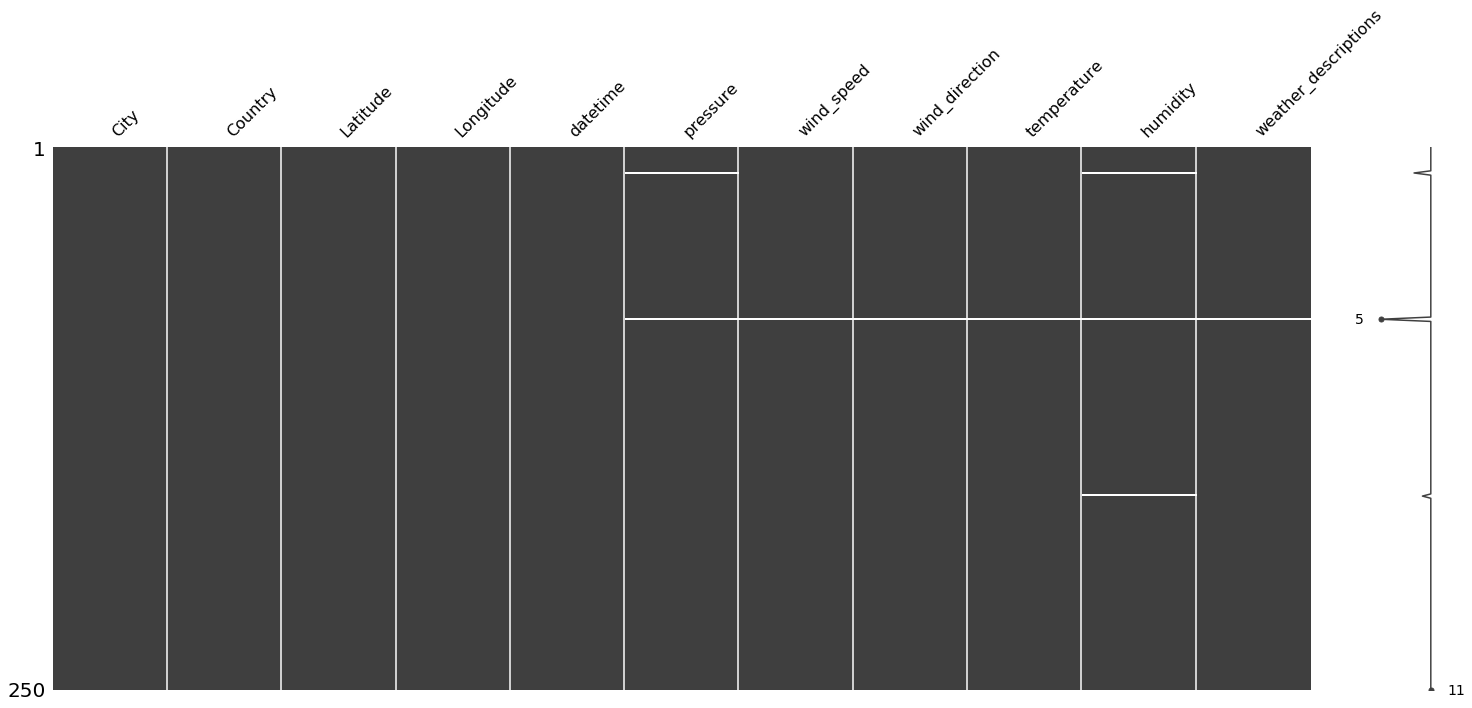

In [8]:
import missingno as msno
msno.matrix(df_merged_copy.sample(250))

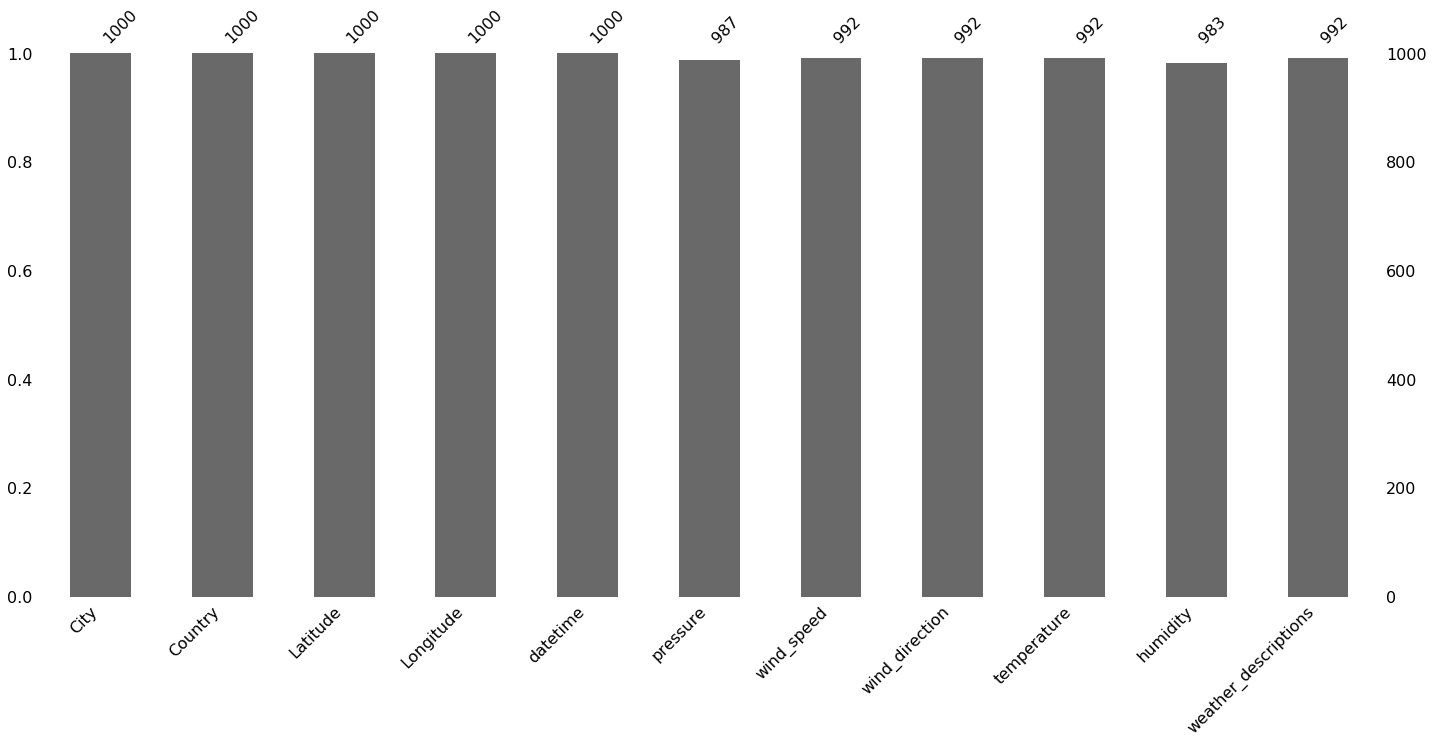

In [9]:
msno.bar(df_merged_copy.sample(1000))


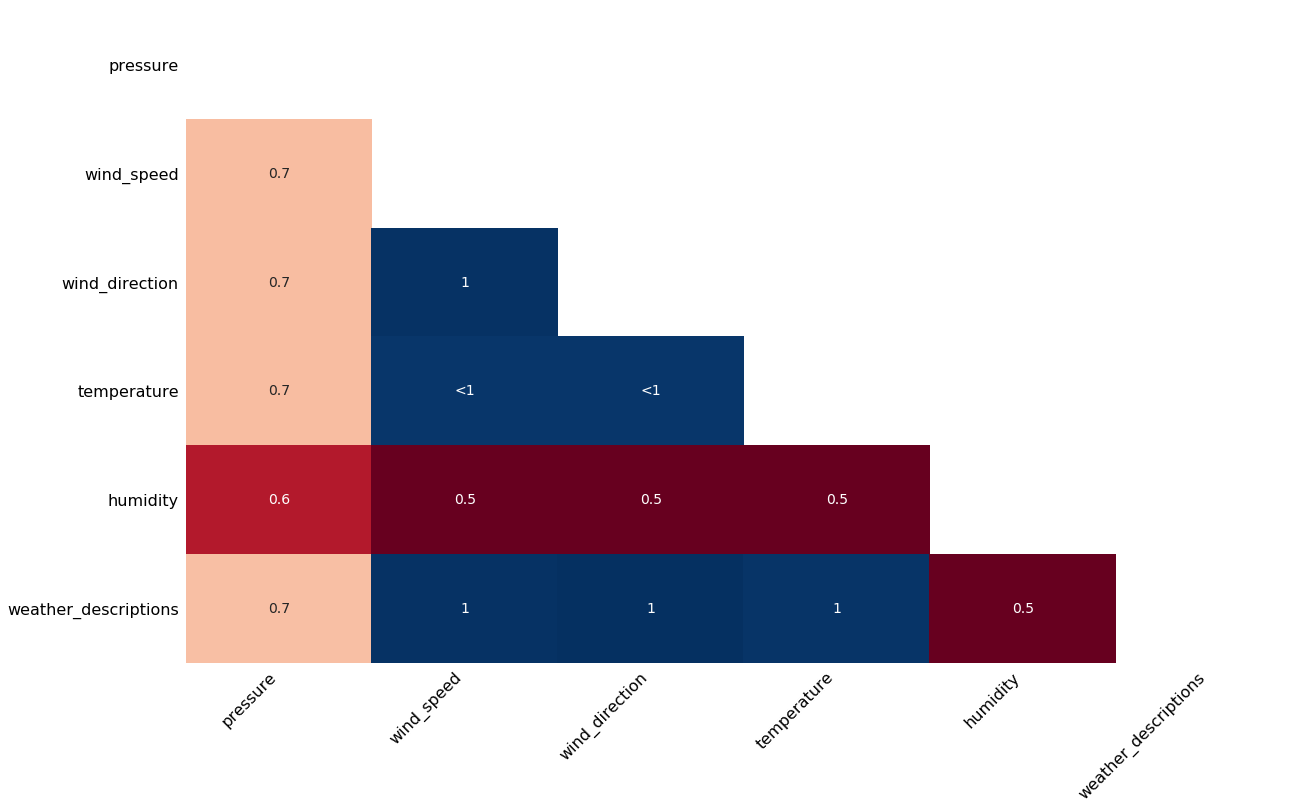

In [10]:
# The missingno correlation heatmap measures nullity correlation: 
# how strongly the presence or absence of one variable affects the presence of another:
msno.heatmap(df_merged_copy)

## How to impute missing values (not removing them, or replacing with 0's)

In [7]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [10]:
df_merged_copy[['weather_descriptions']].sample(10)

,weather_descriptions
623276,sky is clear
113888,light rain
1114908,sky is clear
55346,sky is clear
162787,broken clouds
1041860,scattered clouds
790622,scattered clouds
608353,sky is clear
459083,overcast clouds
76666,sky is clear


In [11]:
df_merged_imputed = df_merged_copy

In [29]:
df_merged_copy.isnull().sum()

City                        0
Country                     0
Latitude                    0
Longitude                   0
datetime                    0
pressure                16680
wind_speed               7993
wind_direction           7975
temperature              8030
humidity                28651
weather_descriptions     7955
dtype: int64

In [12]:
for col in df_merged_copy.columns:
    if df_merged_copy[col].dtypes in ['int', 'float'] and df_merged_copy[col].isnull().sum() > 0 :
        df_merged_imputed[col] = imp_median.fit_transform(df_merged_copy[[col]])
        print('imputed type int/float %s' %(col))
    elif df_merged_copy[col].dtype == np.dtype('O') and df_merged_copy[col].isnull().sum() > 0 :
        # categorical -- impute with mode
        df_merged_imputed[col] = df_merged_copy[[col]].fillna(value=df_merged_copy[col].value_counts().index[0])
        print('imputed other type %s' %(col))
    else:
        print('No missing values in %s, no need to impute. Skip.' %(col))
        

No missing values in City, no need to impute. Skip.
No missing values in Country, no need to impute. Skip.
No missing values in Latitude, no need to impute. Skip.
No missing values in Longitude, no need to impute. Skip.
No missing values in datetime, no need to impute. Skip.
imputed type int/float pressure
imputed type int/float wind_speed
imputed type int/float wind_direction
imputed type int/float temperature
imputed type int/float humidity
imputed other type weather_descriptions


In [32]:
df_merged_imputed.isnull().sum()

City                    0
Country                 0
Latitude                0
Longitude               0
datetime                0
pressure                0
wind_speed              0
wind_direction          0
temperature             0
humidity                0
weather_descriptions    0
dtype: int64

In [11]:
df_merged_copy['weather_descriptions'].value_counts().index[0]

'sky is clear'

## Exploring Data Visually

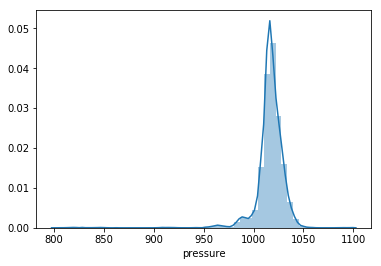

In [33]:
import seaborn as sns
sns.distplot(df_merged_imputed.pressure);

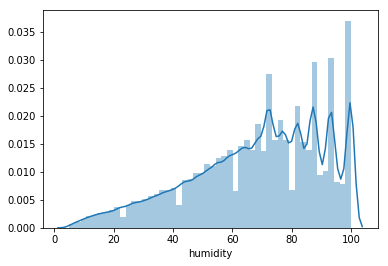

In [34]:
sns.distplot(df_merged_imputed.humidity);

### Investigating pairwise relationships

In [14]:
from pandas.plotting import scatter_matrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


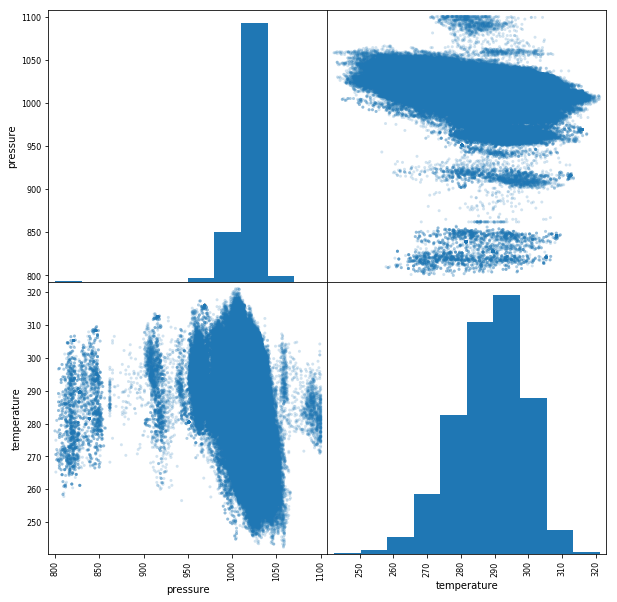

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(df_merged_imputed[['pressure', 'temperature']], alpha=0.2, diagonal='hist', ax=ax);

In [16]:
scatter_matrix(df_merged_imputed[['wind_speed', 'wind_direction']], alpha=0.2, diagonal='hist', ax=ax);

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


## Working with timestamp data

## Working with spatial data

# Other useful tips 

### Convert many columns to categorical types at once

#### Toy example

In [16]:
df = pd.DataFrame({'A' : list('aabbcd'), 'B' : list('ffghhe')})
print('old df.dtypes.... \n', df.dtypes, '\n')

df.apply(lambda x: x.astype('category'))       

print('Check new df.dtypes....')
df.apply(lambda x: x.astype('category')).dtypes


old df.dtypes.... 
 A    object
B    object
dtype: object 

Check new df.dtypes....


A    category
B    category
dtype: object

### Another handy tip for modifying column names in batches

In [31]:
keep_same = {'datetime'}
datadict['pressure'].columns = ['{}{}'.format(c, '' if c in keep_same else '_pressure') 
                                for c in datadict['pressure'].columns]
datadict['pressure'].columns

Index(['datetime', 'Vancouver_pressure', 'Portland_pressure',
       'San Francisco_pressure', 'Seattle_pressure', 'Los Angeles_pressure',
       'San Diego_pressure', 'Las Vegas_pressure', 'Phoenix_pressure',
       'Albuquerque_pressure', 'Denver_pressure', 'San Antonio_pressure',
       'Dallas_pressure', 'Houston_pressure', 'Kansas City_pressure',
       'Minneapolis_pressure', 'Saint Louis_pressure', 'Chicago_pressure',
       'Nashville_pressure', 'Indianapolis_pressure', 'Atlanta_pressure',
       'Detroit_pressure', 'Jacksonville_pressure', 'Charlotte_pressure',
       'Miami_pressure', 'Pittsburgh_pressure', 'Toronto_pressure',
       'Philadelphia_pressure', 'New York_pressure', 'Montreal_pressure',
       'Boston_pressure', 'Beersheba_pressure', 'Tel Aviv District_pressure',
       'Eilat_pressure', 'Haifa_pressure', 'Nahariyya_pressure',
       'Jerusalem_pressure'],
      dtype='object')

In [33]:
### Rename columns
df_merged_copy.rename(columns={'pressure_xyz': 'pressure'}, inplace=True)

### Dealing with missing values

In [42]:
## but if you also choose to use forward-fill or back-fill:

data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
print("Initial data \n", data, "\n")

#### forward-fill
data.fillna(method='ffill')
print("Forward-fill \n", data.fillna(method='ffill'), "\n")

#### back-fill
data.fillna(method='bfill')
print("Back-fill \n", data.fillna(method='bfill'), "\n")


Initial data 
 a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64 

Forward-fill 
 a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64 

Back-fill 
 a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64 

